# Welcome to Session 1 of Head Start Machine Learning Workshop! 


---


In here, you are going to:
- build a `linear regression model`
- implement `batch gradient descent` to optimize the model
- apply the linear regression model on a 1D dataset and 2D dataset to `make prediction`
- perform `feature scaling` (min-max normalization, standardization) to speed up gradient descent
- `visualize the prediction` of the model
- `visualize the cost function` of linear regression
- understand `underfitting and overfitting`

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github.com/dscum/Head-Start-ML/blob/main/session-1/workshop%201%20nb%20(live%20ver).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>



---

## Table of contents
1 - [Generate dataset](#1) \
2 - [Build a linear regression model](#2) \
3 - [Make prediction on datasets](#3) \
4 - [Feature scaling](#4) \
5 - [Overfitting & underfitting](#5) \
6 - [Exercise: Diabetes dataset](#exercise) \
7 - [Key takeaway](#key-takeaway)



In [ ]:
# Import needed libraries & functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

<a name="1"></a>
# 1. Generate dataset

In [ ]:
## Prewritten code ##
def generate_dataset(n=1, seed=None):
    if n == 1:
        # 1D input
        np.random.seed(seed)
        exercise_mins_per_week = np.random.rand(100) * 150
        np.random.seed(seed)
        weight_kg = -(exercise_mins_per_week / 150 * 50) + 100 + np.random.randn(100) * 10
        X = exercise_mins_per_week.reshape(-1, 1)
        y = weight_kg.reshape(-1, 1)
    elif n == 2:
        # 2D input
        np.random.seed(seed)
        exercise_mins_per_week = np.random.rand(100) * 150
        np.random.seed(seed+1)
        calories = np.random.rand(100) * 2500
        np.random.seed(seed)
        weight_kg = -(exercise_mins_per_week / 150 * 50) + 80 + (calories / 2500 * 30) + np.random.randn(100) * 10
        X = np.c_[exercise_mins_per_week, calories]
        y = weight_kg.reshape(-1, 1)
    
    return X, y

## Dataset with 1 feature

In [ ]:
## Your code here ##

# Generate 1D dataset and put into X1D and y1D


In [ ]:
## Your code here ##

# Plot the data for visualization


## Dataset with 2 features

In [ ]:
## Your code here ##

# Generate 2D dataset and put into X2D and y2D


In [ ]:
## Your code here ##

# Plot the data for visualization


## Let's try to solve "dataset with 1 feature" using the easiest way

In [ ]:
## Prewritten code ##

# Import LinearRegression from sklearn module
from sklearn.linear_model import LinearRegression

# Init the model
lin_reg = LinearRegression()

# Train the model
lin_reg.fit(X1D, y1D)

In [ ]:
## Prewritten code ##

# Init X that spans the entire x-axis
X_temp = np.linspace(X1D.min(), X1D.max(), 100).reshape(-1, 1)

# Make prediction on every X that spans the x-axis
y_temp_pred = lin_reg.predict(X_temp)

# Plot the prediction
plt.plot(X_temp, y_temp_pred, c="r", label="prediction")

# Plot the data
plt.scatter(X1D, y1D)
plt.xlabel("exercise_mins")
plt.ylabel("weight_kg")
plt.legend()
plt.show()

Problem solved! We can make a quite good prediction with this model

<a name="2"></a>
# 2. Build a linear regression model

## Concatenate a column of 1's to $X$


---


Implementation notes:
$$
X = \begin{bmatrix}
x^{(1)}_1 & x^{(1)}_2 & \dots & x^{(1)}_n \\ 
x^{(2)}_1 & x^{(2)}_2 & \dots & x^{(2)}_n \\ 
\vdots & \vdots & \ddots & \vdots \\ 
x^{(m)}_1 & x^{(m)}_2 & \dots & x^{(m)}_n \\
\end{bmatrix}
\longrightarrow
X_{prep} = \begin{bmatrix}
1 & x^{(1)}_1 & x^{(1)}_2 & \dots & x^{(1)}_n \\ 
1 & x^{(2)}_1 & x^{(2)}_2 & \dots & x^{(2)}_n \\ 
\vdots & \vdots & \vdots & \ddots & \vdots \\ 
1 & x^{(m)}_1 & x^{(m)}_2 & \dots & x^{(m)}_n \\
\end{bmatrix}
$$
<br>

- concatenate a column of 1 to $X$ so that we can directly compute $h(X_{prep}) = X_{prep} \cdot \theta$ using matrix multiplication instead of $h(X) = \theta_0 + \theta_1 \vec{x_1} + ... + \theta_n \vec{x_n}$ 

In [ ]:
## Your code here ##
def concat_x0(X):
    pass

## Model hypothesis


---


Implementation notes:

$$
h(x^{(i)}) = \theta_0 + \theta_1 x_1^{(i)} + ... + \theta_n x_n^{(i)} \ \ \ \  \text{for an instance $i$} \\
$$

<br>
Vectorized version:
$$
h(X_{prep}) = X_{prep} \cdot \vec{\theta} \ \ \ \  \text{for $m$ instances}
$$
<br>

- vectorized implementation is 
    - easier to implement (no for loop needed) 
    - more intuitive to understand
    - faster to compute (will be proven in session 2, stay tuned!)

In [ ]:
## Your code here ##
def predict(X_prep, theta):
    pass

## Cost function


---


Implementation notes:
$$
\begin{aligned}
J(\theta)
&= \dfrac{1}{2m} \sum^{m}_{i=1} (h(x^{(i)}) - y^{(i)})^2 \\
&= \dfrac{1}{2m} \sum^{m}_{i=1} (\theta_0 \cdot 1 + \theta_1 x^{(i)}_{1} + \theta_2 x^{(i)}_{2} + \dots + \theta_n x^{(i)}_{n} - y^{(i)})^2 \\
\end{aligned}
$$


Vectorizeed version:
$$
J(\theta) = \frac{1}{2m}(h(X_{prep}) - \vec{y})^\top(h(X_{prep}) - \vec{y})
$$


- This cost function is called **mean squared error**
- You can opt to use any other relevant cost function such as **mean absolute error**

In [ ]:
## Your code here ##
def compute_cost(y_true, y_pred):
    pass

## Derivative of cost function w.r.t $\theta_0, \theta_1, ... \theta_n$


---


Implementation notes:
- We need to compute the following gradient vector, $\nabla J(\theta)$ to update $\theta_0$, ..., $\theta_n$ 

$$
\nabla J(\theta) = \begin{bmatrix}
\dfrac{\partial J(\theta)}{\partial \theta_0} \\
\dfrac{\partial J(\theta)}{\partial \theta_1} \\
\vdots \\
\dfrac{\partial J(\theta)}{\partial \theta_n} \\
\end{bmatrix} \\
$$

$
\begin{aligned}
\frac{\partial J(\theta)}{\partial \theta_0} &=  \frac{1}{m} \sum\limits_{i=1}^{m}  \left(h_\theta(x^{(i)}) - y^{(i)} \right) \\
\frac{\partial J(\theta)}{\partial \theta_j} &= \frac{1}{m} \sum\limits_{i=1}^{m}   x_j^{(i)} \cdot \left(h_\theta(x^{(i)}) - y^{(i)}  \right) \ \ \ \text{for $j = 1$ to $n$}
\end{aligned}
$

<br><br>
Vectorized version:
$$
\nabla J(\theta) = \frac 1m X_{prep}^\top (h(X_{prep}) - \vec{y})
$$


In [ ]:
## Your code here ##
def cost_gradients(y_pred, y_true, X_prep):
    pass

## Gradient descent


---


Implementation notes:

$$
\begin{align*}
& \text{repeat until convergence:} \; \lbrace \newline 
\; & \theta_0 := \theta_0 - \alpha \dfrac{\partial J(\theta)}{\partial \theta_0} \newline
\; & \theta_1 := \theta_1 - \alpha \dfrac{\partial J(\theta)}{\partial \theta_1} \newline
& \dots \newline
\; & \theta_n := \theta_n - \alpha \dfrac{\partial J(\theta)}{\partial \theta_n} \newline
\newline \rbrace
\end{align*}
$$
<br>
Vectorized version:
$$
\begin{align*}
& \text{repeat until convergence:} \; \lbrace \newline 
\; & \vec{\theta} := \vec{\theta} - \alpha \nabla J(\theta) \newline \newline \rbrace
\end{align*}
$$

In [ ]:
## Your code here ##
def gradient_descent(n_iterations, learning_rate, X_prep, y_true, theta):
    history = dict()

    for i in range(n_iterations):
        # Predict with current theta
        y_pred = None

        # Compute the cost based on the prediction
        cost = None

        # Print the cost while training and save cost & theta at certain iterations before updating theta
        if (n_iterations <= 10000 and (i % 10 == 0 or i == n_iterations - 1)) or (n_iterations > 10000 and (i % 1000 == 0 or i == n_iterations - 1)):
            print(f"Iteration {i}, cost = {np.round(cost, 4)}")
            history[i] = {"cost": cost, "theta": np.copy(theta)}
    
        # Compute the gradients
        grads = None

        # Update theta
        theta = None

    return theta, history

## Extra


---


### Visualize prediction

In [ ]:
## Prewritten code ##
def plot_prediction(X_prep, y, theta, n_dimensions=1):
    X = X_prep[:, 1:]
 
    if n_dimensions == 1: 
        # 1D data
        X_temp = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
        
        X_temp_prep = concat_x0(X_temp)
        y_temp_pred = np.dot(X_temp_prep, theta)

        plt.scatter(X, y, s=10)
        plt.plot(X_temp, y_temp_pred, c="r", linewidth=1)
        plt.xlabel("exercise_mins")
        plt.ylabel("weight_kg")
        plt.show()

    elif n_dimensions == 2:
        # 2D data
        x1_surf, x2_surf = np.meshgrid(
            np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
            np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
        )
        xx = np.c_[x1_surf.ravel(), x2_surf.ravel()]
        xx = np.c_[np.ones((len(xx), 1)), xx]
        y_pred = predict(xx, theta)
        y_pred = y_pred.reshape(x1_surf.shape)

        fig = plt.figure()
        ax = fig.add_subplot(111, projection="3d")
        ax.scatter(X[:, 0], X[:, 1], y, c="red", marker="o", alpha=0.5)
        ax.plot_surface(x1_surf, x2_surf, y_pred, color="b", alpha=0.3)
        ax.set_xlabel("exercise_mins")
        ax.set_ylabel("calories")
        ax.set_zlabel("weight_kg")
        plt.show()

### Visualize cost function

In [ ]:
## Prewritten code ##
def visualize_cost(X_prep, y, history, zoom_in=True):

    cost_hist = None
    theta_hist = None
    for i, iteration in enumerate(history):
        current_cost = history[iteration]["cost"]
        current_theta = history[iteration]["theta"]
        
        if i == 0:
            cost_hist = np.array(current_cost)
            theta_hist = current_theta.T
        else:
            cost_hist = np.r_[cost_hist, current_cost]
            theta_hist = np.r_[theta_hist, current_theta.T]

    if zoom_in:
        theta0_min = theta_hist[:, 0].min() - 10
        theta0_max = theta_hist[:, 0].max() + 10
        theta1_min = theta_hist[:, 1].min() - 10
        theta1_max = theta_hist[:, 1].max() + 10
    else:
        theta0_min = -100
        theta0_max = 100
        theta1_min = -100
        theta1_max = 100

    theta0, theta1 = np.meshgrid(
        np.linspace(theta0_min, theta0_max, 100),
        np.linspace(theta1_min, theta1_max, 100)
    )
    theta_temp = np.c_[theta0.ravel(), theta1.ravel()]

    costs = np.zeros((theta0.ravel().shape))
    for i in range(len(costs)):
        current_theta = theta_temp[i, :].reshape(1, -1).T
        y_pred_temp = predict(X_prep, current_theta)
        costs[i] = compute_cost(y_pred_temp, y)
    
    costs = costs.reshape(theta0.shape)

    # Use Matplotlib to create 3D static plot
    # fig = plt.figure()
    # ax = fig.add_subplot(111, projection="3d")

    # # Plot coordinates of previous theta on the cost
    # ax.scatter(theta_hist[:, 0], theta_hist[:, 1], cost_hist, s=20, c="r")

    # # Plot the cost function
    # from matplotlib import cm
    # ax.plot_surface(theta0, theta1, costs, cmap=cm.jet, linewidth=0, antialiased=False, alpha=0.2)
    # ax.set_xlabel(r"$\theta_0$")
    # ax.set_ylabel(r"$\theta_1$")
    # ax.set_zlabel(r"$J(\theta)$")

    # plt.show()

    # Use Plotly to create 3D interactive plot
    fig = go.Figure(data=[go.Surface(x=theta0, y=theta1, z=costs, opacity=0.2, colorscale="jet")])
    fig.add_scatter3d(x=theta_hist[:, 0], y=theta_hist[:, 1], z=cost_hist, mode="markers", marker_size=5)
    fig.update_layout(
        scene=dict(xaxis_title="theta_0", yaxis_title="theta_1", zaxis_title="cost",
            annotations=[
                dict(
                    x=theta_hist[0, 0],
                    y=theta_hist[0, 1],
                    z=cost_hist[0],
                    text=f"Epoch {list(history.keys())[0]}",
                    textangle=0,
                    ax=0,
                    ay=-75,
                    font=dict(
                        color="black",
                        size=12
                    ),
                    arrowcolor="black",
                    arrowsize=3,
                    arrowwidth=1,
                    arrowhead=1),
                dict(
                    x=theta_hist[len(cost_hist) // 2, 0],
                    y=theta_hist[len(cost_hist) // 2, 1],
                    z=cost_hist[len(cost_hist) // 2],
                    text=f"Epoch {list(history.keys())[len(cost_hist) // 2]}",
                    textangle=0,
                    ax=0,
                    ay=-75,
                    font=dict(
                        color="black",
                        size=12
                    ),
                    arrowcolor="black",
                    arrowsize=3,
                    arrowwidth=1,
                    arrowhead=1),
                dict(
                    x=theta_hist[-1, 0],
                    y=theta_hist[-1, 1],
                    z=cost_hist[-1],
                    text=f"Epoch {list(history.keys())[-1]}",
                    textangle=0,
                    ax=0,
                    ay=-75,
                    font=dict(
                        color="black",
                        size=12
                    ),
                    arrowcolor="black",
                    arrowsize=3,
                    arrowwidth=1,
                    arrowhead=1)]
        ),
    )
    fig.show()

<a name="3"></a>
# 3. Use your linear regression model to make prediction on datasets

## Dataset with 1 feature

In [ ]:
## Your code here ##

# Check the shape of 1D data


In [ ]:
## Prewritten code ##

# Visualize the 1D data again
plt.scatter(X1D, y1D)
plt.xlabel("exercise_mins")
plt.ylabel("exercise_mins")
plt.show()

In [ ]:
## Your code here ##

# number of features
n1D = None

# Concatenate a column of 1's to the left of X
X1D_prep = None

# Initialize theta
np.random.seed(1) # Set seed just for the sake of getting same random value during the workshop
theta1D = None

In [ ]:
## Your code here ##

# Train your model using Gradient Descent
# You can try out different learning rate and number of iterations
theta1D_new, history1D = None

In [ ]:
## Prewritten code ##

# Plot learning curve
plt.plot([history1D[key]["cost"] for key in history1D])
plt.ylabel("Cost")
plt.xlabel(f"Iteration x 1000")
plt.show()

In [ ]:
## Your code here ##

# Plot the prediction using old theta

# Plot the prediction using new theta


In [ ]:
## Your code here ##

# Visualize the cost


In [ ]:
## Your code here ##

# Make prediction
X1D_temp = np.array([[100]])
X1D_temp_prep = None
y1D_temp_pred = None
print(y1D_temp_pred)

In [ ]:
## Your code here ##

# Cost of this model
y1D_pred = None
cost1D = None
print("Cost:", cost1D)

## Dataset with 2 features

In [ ]:
## Prewritten code ##

print(X2D.shape)
print(y2D.shape)

In [ ]:
## Prewritten code ##

fig = px.scatter_3d(x=X2D[:, 0], y=X2D[:, 1], z=y2D)
fig.update_layout(scene=dict(xaxis_title="exercise_mins", yaxis_title="calories", zaxis_title="weight_kg"))
fig.show()

In [ ]:
## Your code here ##

# number of features
n2D = None

# Concatenate a column of 1 to X
X2D_prep = None

# Initialize theta
np.random.seed(1) # Set seed just for the sake of getting same random value during the workshop
theta2D = None

In [ ]:
## Your code here ##

# Train your model using Gradient Descent
# You can try out different learning rate and number of iterations
theta2D_new, history2D = None

In [ ]:
## Prewritten code ##

# Plot learning curve
plt.plot([history2D[key]["cost"] for key in history2D])
plt.ylabel("Cost")
plt.xlabel(f"Iteration x 10")
plt.show()

In [ ]:
## Your code here ##

# Plot the prediction using old theta

# Plot the prediction using new theta


In [ ]:
## Your code here ##

# Make prediction
X2D_temp = np.array([[100, 1500]])
X2D_temp_prep = None
y2D_temp_pred = None
print(y2D_temp_pred)

In [ ]:
## Your code here ##

# Cost of this model
y2D_pred = None
cost2D = None
print("Cost:", cost2D)

<a name="4"></a>
# 4. Feature scaling

- An important step to speed up gradient descent
- Gradient Descent based algorithms need data to be scaled, difference in ranges of features will cause different step sizes for each feature
- Avoid gradient to be too large. It will cause gradient descent to overshoot very easily


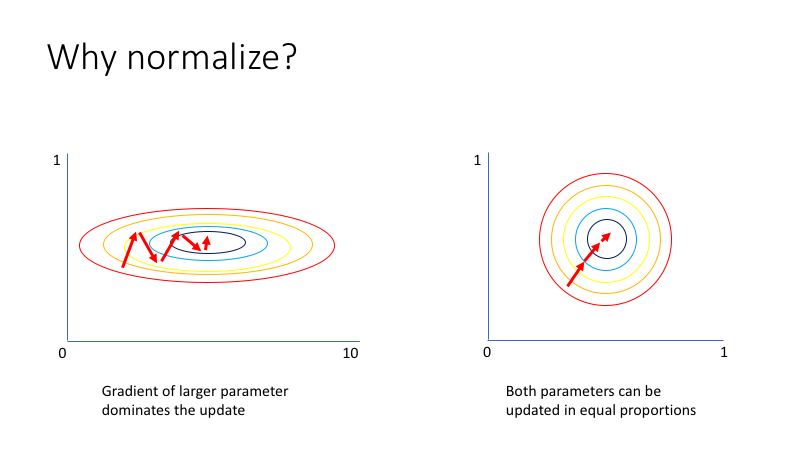

## Min-max scaling / Normalization
$$
x_{norm} = \frac{x - min(x)}{max(x) - min(x)}
$$
- Scale X into the range of [0, 1]
- Good to use when you know the distribution of your data does not follow Gaussian distribution

## Standardization
$$
x_{norm} = \frac{x - mean(x)}{std(x)}
$$
- Scale X to make it looks like standard normally distributed data (Gaussian with 0 mean and unit variance)
- Helpful when data follows Gaussian distribution
- No bounding range
- Outlier in the data will affect standardization

In [ ]:
## Your code here ##

def min_max_scaling(X):
    # Scale X into the range of [0, 1]
    X_scaled = None
    return X_scaled

def standardization(X):
    # Scale X to make X look like standard normally distributed data (Gaussian with 0 mean and unit variance)
    X_scaled = None
    return X_scaled

In [ ]:
## Prewritten code ##
X2D_standardized = standardization(X2D)
X2D_normalized = min_max_scaling(X2D)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
ax[0].set_title("Original")
ax[0].scatter(X2D[:, 0], X2D[:, 1])
ax[0].set_ylabel(r"$x_2$")
ax[0].set_xlabel(r"$x_1$")
ax[1].set_title("Standardized")
ax[1].scatter(X2D_standardized[:, 0], X2D_standardized[:, 1])
ax[1].set_xlabel(r"$x_1$")
ax[2].set_title("Min-max scaled")
ax[2].scatter(X2D_normalized[:, 0], X2D_normalized[:, 1])
ax[2].set_xlabel(r"$x_1$")
plt.show()
print("Observe the value of x_1 and x_2")

## Scale the dataset with 1 feature and perform gradient descent again
- Don't need to scale $\vec{x_0}$, because we use $x_0 = 1$ just to ensure $\theta_0 x_0  = \theta_0$ 
- Don't need to scale $\vec{y}$, because $\vec{y}$ doesn't affect the shape of cost function

In [ ]:
## Your code here ##

# Perform standardization or min-max scaling to X1D 
X1D_scaled = None

# Concatenate a column of 1's to left of X
X1D_scaled_prep = None

# Get number of features
n1D = None

# Initialize theta
np.random.seed(1)
theta1D_scaled = None

In [ ]:
## Prewritten code ##

# Visualize the data
plt.scatter(X1D_scaled, y1D)
plt.xlabel("exercise_mins")
plt.ylabel("weight_kg")
plt.show()

In [ ]:
## Your code here ##

# Train your model using Gradient Descent
# You can try out different learning rate and number of iterations
theta1D_scaled_new, history1D_scaled = None

In [ ]:
## Prewritten code ##

# Plot learning curve
plt.plot([history1D_scaled[key]["cost"] for key in history1D_scaled])
plt.ylabel("Cost")
plt.xlabel(f"Iteration x 10")
plt.show()

In [ ]:
## Your code here ##

# Visualize the cost


In [ ]:
## Your code here ##

# Plot prediction


## QUESTION: If we have new input, and we want to predict the target value of it, do we need to scale it? Scale it based on what?


<a name="5"></a>
# 5. The problem of overfitting & underfitting

## Understand overfitting and underfitting using Polynomial Regression


---


### Polynomial Regression
$$
h(x) = \theta_0 + \theta_1 x \\
\Bigg\downarrow \text{degree 2} \\
h(x) = \theta_0 + \theta_1 x + \theta_2 x^2 \\
$$
- change hypothesis function so that it won't just appear to be linear (can make it quadratic for curve, etc.)

In [ ]:
## Prewritten code ##

# Generate quadratic data
np.random.seed(1)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).reshape(-1, 1)

In [ ]:
## Prewritten code ##

plt.scatter(X, y)
plt.show()

In [ ]:
## Prewritten code ##

from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [ ]:
## Prewritten code ##

print("Computed polynomial features:", poly_features.get_feature_names())
print("Before polynomial:", X[0])
print("After polynomial:", X_poly[0])

In [ ]:
## Prewritten code ##

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

X_temp = np.linspace(-1, 1, 100).reshape(100, 1)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for index, degree in enumerate([1, 2, 300]):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    
    # Create a pipeline to combine into Polynomial Regression
    polynomial_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg)
    ])
    polynomial_regression.fit(X, y)
    y_temp = polynomial_regression.predict(X_temp)
    ax[index].plot(X_temp, y_temp, c="orange", label="Prediction")
    ax[index].scatter(X, y)
    ax[index].set_title(f"degree {degree}")
    ax[index].set_xlim([-1, 1])
    ax[index].set_ylim([0, 1])
    ax[index].legend()
plt.show()

> **Underfit / High bias**
- model is not fitting the data well (probably gradient descent haven't reach optimal point / model hypothesis is not complex enough to fit the data)


> **Optimal**
- this is what we want to achieve

> **Overfit / high variance**
- model fit the training data too well, causes it can't generalize to real-world data

<a name="exercise"></a>
# Exercise: Linear Regression on diabetes dataset

In [ ]:
## Prewritten code ##
from sklearn.datasets import load_diabetes

# Load diabetes dataset
data = load_diabetes()
data.keys()

In [ ]:
## Prewritten code ##

# Print dataset's description
print(data["DESCR"])

In [ ]:
## Prewritten code ##

# Get X and y
X = data["data"]
y = data["target"].reshape(-1, 1)
print(X.shape, y.shape)

In [ ]:
## Prewritten code ##

# Visualize the diabetes dataset in a DataFrame
df = pd.DataFrame(data=np.c_[X, y], columns=data["feature_names"] + ["target"])
df

## Using my own model

In [ ]:
## Your code here ##

# Number of features

# Init theta

# Concatenate column of 1's to X


In [ ]:
## Your code here ##

# Train the model


In [ ]:
## Your code here ##

# Plot the learning curve


## Using model from sklearn

In [ ]:
## Prewritten code ##

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)
mse_lr = compute_cost(y_true=y, y_pred=lr.predict(X))
print("MSE using model from sklearn:", mse_lr)
print("RMSE using model from sklearn:", np.sqrt(mse_lr))

## QUESTION: When do we know the algorithm has been converged to a global minimum?



<a name="key-takeaway"></a>
# Key takeaway:

> Common notations\terms such as:
- Model hypothesis, $h(x)$
- Model parameters (bias, weight), $\theta$
- Cost function, $J(\theta)$


> Shape is helpful to know when doing ML

> Vectorization makes things easier

> Gradient descent to train model

> Feature scaling can increase training speed

In [ ]:
# END